U.S Housing Price Forecasting For College Students Using Data Mining Techniques 


In [ ]:
import pandas as pd
from google.colab import drive
drive.mount("/drive")

rent_price = pd.read_csv("/drive/Shareddrives/CSCE676/Datasets/price.csv")
rent_price_per_sqrt = pd.read_csv("/drive/Shareddrives/CSCE676/Datasets/pricepersqft.csv")

Austin_reviews = pd.read_csv("/drive/Shareddrives/CSCE676/Datasets/Austin_reviews.csv")
Austin_listings = pd.read_csv("/drive/Shareddrives/CSCE676/Datasets/Austin_listings.csv")
Austin_calendar = pd.read_csv("/drive/Shareddrives/CSCE676/Datasets/Austin_calendar.csv")

Mounted at /drive


In [ ]:
print(Austin_reviews.describe()) 365768
print(Austin_listings.describe())  11269

         listing_id            id   reviewer_id
count  3.657680e+05  3.657680e+05  3.657680e+05
mean   1.909508e+07  4.886029e+16  1.097557e+08
std    1.466222e+07  1.364980e+17  1.059777e+08
min    2.265000e+03  8.650000e+02  3.000000e+00
25%    5.277923e+06  2.344223e+08  2.513040e+07
50%    1.766518e+07  4.761224e+08  7.241154e+07
75%    2.890668e+07  7.054756e+08  1.688215e+08
max    5.269198e+07  4.731922e+17  4.268852e+08
                 id  ...  reviews_per_month
count  1.126900e+04  ...        8547.000000
mean   3.074065e+07  ...           2.704058
std    1.699900e+07  ...           8.115504
min    2.265000e+03  ...           0.010000
25%    1.684231e+07  ...           0.220000
50%    3.257783e+07  ...           1.000000
75%    4.773420e+07  ...           2.690000
max    5.277708e+07  ...         305.000000

[8 rows x 42 columns]


In [ ]:
!pip install pyspark
!pip install graphframes
!pip install -U -q PyDrive
!apt install openjdk-8-jdk-headless -qq
!curl -L -o "/usr/local/lib/python3.7/dist-packages/pyspark/jars/graphframes-0.8.1-spark3.0-s_2.12.jar" https://repos.spark-packages.org/graphframes/graphframes/0.8.1-spark3.0-s_2.12/graphframes-0.8.1-spark3.0-s_2.12.jar


     |████████████████████████████████| 281.3 MB 43 kB/s 
     |████████████████████████████████| 198 kB 64.8 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.0-py2.py3-none-any.whl size=281805912 sha256=14c8c48134c31425b3a6286dd528ec19a88afdfaeb338ef4ce217b8ef0f707bc
  Stored in directory: /root/.cache/pip/wheels/0b/de/d2/9be5d59d7331c6c2a7c1b6d1a4f463ce107332b1ecd4e80718
Successfully built pyspark
     |████████████████████████████████| 154 kB 43.6 MB/s 
The following additional packages will be installed:
  openjdk-8-jre-headless
Suggested packages:
  openjdk-8-demo openjdk-8-source libnss-mdns fonts-dejavu-extra
  fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  fonts-wqy-zenhei fonts-indic
The following NEW packages will be installed:
  openjdk-8-jdk-headless openjdk-8-jre-headless
0 upgraded, 2 newly installed, 0 to remove and 37 not upgraded.
Need to get 36.5 MB of archives.
After this operation, 143 MB of additional disk space will be used.
Selecting previo

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
import pyspark
from pyspark.sql import *
from pyspark.sql.types import *
from pyspark import SparkContext, SparkConf
# create the session
conf = SparkConf().set("spark.ui.port", "4050")

# create the context
sc = pyspark.SparkContext(conf=conf)
spark = SparkSession.builder.getOrCreate()


In [ ]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip


--2021-12-09 02:37:51--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 52.202.168.65, 54.237.133.81, 54.161.241.46, ...
Connecting to bin.equinox.io (bin.equinox.io)|52.202.168.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13832437 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.19M  --.-KB/s    in 0.1s    

2021-12-09 02:37:51 (98.1 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13832437/13832437]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [ ]:
get_ipython().system_raw('./ngrok http 4050 &')
!./ngrok authtoken 1zR6BpOXflYrKw7VbiQGL9ZWogH_hsopCGchUkDRAZ2BJjrK
!curl -s http://localhost:4040/api/tunnels | python3 -c "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml
https://15e2-34-86-237-235.ngrok.io


In [ ]:
print(Austin_reviews.head(20))

    listing_id  ...                                           comments
0         2265  ...  I stayed here during SXSW and had a really ple...
1         2265  ...  Great place, close enough to everything downto...
2         2265  ...  We had a great time in Austin staying at Paddy...
3         2265  ...  We had a great stay at Zen East for South By S...
4         2265  ...  I arrived late in the evening so did not meet ...
5         2265  ...  a really welcoming place to stay, lovely back ...
6         2265  ...  We stayed here for the F1 race weekend and it ...
7         2265  ...  Paddy's place was just as advertised. It was c...
8         2265  ...  I stayed at Zen-East during SXSW.  It is a lov...
9         2265  ...  Paddy was extremely responsive and accommodati...
10        2265  ...  Paddy was helpful with orientation and warning...
11        2265  ...  We stayed at Paddy's for ACL and it couldn't h...
12        2265  ...  We loved staying at Paddy's peaceful, charming...
13    

In [ ]:
from pyspark.ml.fpm import FPGrowth
from pyspark.sql.types import *
import pyspark.sql.functions as F
from pyspark.sql.functions import col, split 
from pyspark.sql.functions import array_distinct
from pyspark.sql.functions import array

# Read the csv into a dataframe
hashtags = spark.read.csv("/drive/Shareddrives/CSCE676/Datasets/Austin_reviews.csv", header=True)
# Change the column name from dafault names to their actual name
hashtags = hashtags.withColumnRenamed("reviewer_id", "userid")
hashtags = hashtags.withColumnRenamed("comments", "hashtag")
hashtags = hashtags.filter(hashtags.userid.cast("int").isNotNull())
hashtags.show()
# To lowercase
hashtags = hashtags.withColumn("hashtag",F.lower(F.col("hashtag")))
hashtags.show()
edited = hashtags.select(["userid",split(col("hashtag")," ").alias("tags")])
edited =  edited.filter(F.size('tags') > 0)
# Then, use the StopWordsRemover on the dataframe
from pyspark.ml.feature import StopWordsRemover
edited_new = StopWordsRemover(inputCol="tags", outputCol="new_tags").transform(edited)
edited_new.show()
edited_v = StopWordsRemover(inputCol="new_tags", outputCol="new_new_tags", stopWords=[""," ","stay","great","place","definitely","the","with","a","an","austin","recommend","location","highly","perfect","austin.","really","house","super"]).transform(edited_new)
edited_v.show()
# Combine the hashtags based on the userid
edited_new = edited_v.groupby("userid").agg(F.max("new_new_tags").alias("new_hashtag"))
edited_new.show()
edited_new = edited_new.withColumn("newtags", array_distinct("new_hashtag"))
edited_new.show()

+----------+---------+----------+--------+-------------+--------------------+
|listing_id|       id|      date|  userid|reviewer_name|             hashtag|
+----------+---------+----------+--------+-------------+--------------------+
|      2265|      963|2009-03-17|    7538|        Niall|I stayed here dur...|
|      2265|     1057|2009-03-22|   10029|      Michael|Great place, clos...|
|      2265|   200418|2011-03-16|   61677|       Gustaf|We had a great ti...|
|      2265|  1001630|2012-03-15| 1523753|         Noah|We had a great st...|
|      2265|  1016390|2012-03-19| 1547660|      Melissa|I arrived late in...|
|      2265|  2707758|2012-10-24| 2449913|         Nick|a really welcomin...|
|      2265|  2926194|2012-11-20| 3362054|      Chrysta|We stayed here fo...|
|      2265|  3813128|2013-03-18| 4025558|         John|Paddy's place was...|
|      2265| 11005865|2014-03-17|11604963|        Safia|I stayed at Zen-E...|
|      2265| 33015130|2015-05-24|25409641|        Jenna|Paddy wa

In [ ]:
fpGrowth = FPGrowth(itemsCol='newtags', minSupport=0.02)
model = fpGrowth.fit(edited_new)
freq = model.freqItemsets


/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:127: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


In [ ]:
from pyspark.sql.functions import col, size

freq3 =  freq.filter(F.size(col("items")) >= 2)
freq3.show()


+--------------------+-----+
|               items| freq|
+--------------------+-----+
|  [need, everything]| 7223|
|[needed, everything]| 8541|
|       [nice, clean]| 7711|
|  [easy, everything]| 6381|
|       [easy, clean]| 6530|
|    [us, everything]| 6841|
| [distance, walking]|11134|
| [everything, clean]| 9579|
|         [get, easy]| 6828|
|       [close, nice]| 6375|
| [close, everything]| 9490|
|      [close, clean]| 7166|
|   [downtown, close]| 7346|
+--------------------+-----+



In [ ]:
from pyspark.sql.functions import lit, array, array_sort, array_intersect

#group_value = freq3.collect()[1][0]
group_value = ['needed', 'everything']
print(group_value)
#group_clean = freq3.collect()[2][0]
group_clean = ['nice', 'clean']
print(group_clean)
#group_location = freq3.collect()[6][0]
group_location = ['distance', 'walking']
print(group_location)
#group_commu = freq3.collect()[8][0]
group_commu = ['get', 'easy']
print(group_commu)
# ref: https://stackoverflow.com/questions/60840393/filter-array-column-in-a-dataframe-based-on-a-given-input-array-pyspark
# Get the rows which contains the freq items
search = array_sort(array(*[lit(e) for e in group_value]))
group_value = edited_new.where(array_sort(array_intersect(edited_new["newtags"], search)) == search)
group_value.show()
search = array_sort(array(*[lit(e) for e in group_clean]))
group_clean = edited_new.where(array_sort(array_intersect(edited_new["newtags"], search)) == search)
group_clean.show()
search = array_sort(array(*[lit(e) for e in group_location]))
group_location = edited_new.where(array_sort(array_intersect(edited_new["newtags"], search)) == search)
group_location.show()
search = array_sort(array(*[lit(e) for e in group_commu]))
group_commu = edited_new.where(array_sort(array_intersect(edited_new["newtags"], search)) == search)
group_commu.show()

['needed', 'everything']
['nice', 'clean']
['distance', 'walking']
['get', 'easy']
+---------+--------------------+--------------------+
|   userid|         new_hashtag|             newtags|
+---------+--------------------+--------------------+
| 10003338|[happy, kurt's, p...|[happy, kurt's, p...|
|100063698|[regina, hostess!...|[regina, hostess!...|
|100080159|[space, beautiful...|[space, beautiful...|
|100122553|[easy, find, ever...|[easy, find, ever...|
|100244478|[stay!, ashly, ev...|[stay!, ashly, ev...|
| 10031037|[wonderful, house...|[wonderful, house...|
|100406079|[justin’s, amazin...|[justin’s, amazin...|
| 10042306|[carriage, close,...|[carriage, close,...|
|100435319|[walking, block, ...|[walking, block, ...|
|100555157|[wonderful, unexp...|[wonderful, unexp...|
|100693710|[fantastic!, conv...|[fantastic!, conv...|
| 10074939|[apartment, provi...|[apartment, provi...|
| 10074984|[house!, everythi...|[house!, everythi...|
|101068839|[great!, seems, a...|[great!, seems, a...|

In [ ]:
spark.conf.set("spark.sql.execution.arrow.enabled", "true")
value_df = group_value.toPandas()
clean_df = group_clean.toPandas()
location_df = group_location.toPandas()
commu_df = group_commu.toPandas()

In [ ]:
value_users = value_df['userid'].values
value_users = [int(numeric_string) for numeric_string in value_users]
clean_users = clean_df['userid'].values
clean_users = [int(numeric_string) for numeric_string in clean_users]
location_users = location_df['userid'].values
location_users = [int(numeric_string) for numeric_string in location_users]
commu_users = commu_df['userid'].values
commu_users = [int(numeric_string) for numeric_string in commu_users]

In [ ]:
selected1 = Austin_reviews.loc[Austin_reviews['reviewer_id'].isin(value_users)]
value_houses = selected1['listing_id'].values
value_houses = list(set(value_houses))
selected2 = Austin_reviews.loc[Austin_reviews['reviewer_id'].isin(clean_users)]
clean_houses = selected2['listing_id'].values
clean_houses = list(set(clean_houses))
selected3 = Austin_reviews.loc[Austin_reviews['reviewer_id'].isin(location_users)]
location_houses = selected3['listing_id'].values
location_houses = list(set(location_houses))
selected4 = Austin_reviews.loc[Austin_reviews['reviewer_id'].isin(commu_users)]
commu_houses = selected4['listing_id'].values
commu_houses = list(set(commu_houses))

In [ ]:
value_target_houses = Austin_listings.loc[Austin_listings['id'].isin(value_houses)]
value_target_houses = value_target_houses.loc[value_target_houses['number_of_reviews'] >= 22]
clean_target_houses = Austin_listings.loc[Austin_listings['id'].isin(clean_houses)]
clean_target_houses = clean_target_houses.loc[clean_target_houses['number_of_reviews'] >= 22]
location_target_houses = Austin_listings.loc[Austin_listings['id'].isin(location_houses)]
location_target_houses = location_target_houses.loc[location_target_houses['number_of_reviews'] >= 22]
commu_target_houses = Austin_listings.loc[Austin_listings['id'].isin(commu_houses)]
commu_target_houses = commu_target_houses.loc[commu_target_houses['number_of_reviews'] >= 22]

In [ ]:
!pip install xlsxwriter

     |████████████████████████████████| 149 kB 41.9 MB/s 


In [ ]:
%cd

/root


In [ ]:
value_score_df = value_target_houses.assign(f = (value_target_houses['review_scores_rating']+value_target_houses['review_scores_value']+value_target_houses['review_scores_accuracy'])/3).sort_values('f', ascending=False).drop('f', axis=1)
value_score_df = value_score_df.assign(domain='Cost Performance')
value_score_df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,domain
8705,48449085,https://www.airbnb.com/rooms/48449085,20211014050545,2021-10-14,"Charming Austin Cottage, Work/Vacation Lifestyle",Just a 7-minute walk from Austin's taco truck...,"Haymaker, Salty Sow, and Cherrywood Coffee Hou...",https://a0.muscache.com/pictures/miso/Hosting-...,372185009,https://www.airbnb.com/users/show/372185009,Jason,2020-10-16,"Austin, Texas, United States",NaN,within an hour,100%,97%,t,https://a0.muscache.com/im/pictures/user/af2ba...,https://a0.muscache.com/im/pictures/user/af2ba...,Cherrywood,0.0,0.0,"['email', 'phone']",t,t,"Austin, Texas, United States",78722,NaN,30.29022,-97.71922,Entire residential home,Entire home/apt,6,NaN,1 bath,2.0,3.0,"[""Washer"", ""Coffee maker"", ""Fire pit"", ""Outdoo...",$204.00,2,455,2.0,2.0,1125.0,1125.0,2.0,1125.0,NaN,t,9,31,56,136,2021-10-14,24,24,3,2021-09-03,2021-09-29,5.0,5.0,5.00,5.0,5.0,5.00,5.0,NaN,f,2,2,0,0,17.14,Cost Performance
3907,21925063,https://www.airbnb.com/rooms/21925063,20211014050545,2021-10-14,Quanah's Tiny House B & BBQ,"Cozy Tiny House with climate control, wifi, qu...","Do you like wide streets, minimal traffic and ...",https://a0.muscache.com/pictures/ea5ca6fe-001f...,21987980,https://www.airbnb.com/users/show/21987980,Sam,2014-10-01,"Austin, Texas, United States",Hello. Thanks for looking at my listing! Bed &...,within an hour,100%,100%,t,https://a0.muscache.com/im/pictures/user/d6ad2...,https://a0.muscache.com/im/pictures/user/d6ad2...,Cherry Creek,5.0,5.0,"['email', 'phone', 'manual_online', 'reviews',...",t,t,"Austin, Texas, United States",78748,NaN,30.18583,-97.82696,Private room in tiny house,Private room,2,NaN,1 private bath,1.0,1.0,"[""Washer"", ""Coffee maker"", ""BBQ grill"", ""Dishe...",$57.00,30,200,30.0,30.0,1125.0,1125.0,30.0,1125.0,NaN,t,15,15,15,271,2021-10-14,33,4,1,2020-12-14,2021-10-05,5.0,5.0,5.00,5.0,5.0,4.97,5.0,NaN,f,5,0,5,0,3.25,Cost Performance
6247,37044239,https://www.airbnb.com/rooms/37044239,20211014050545,2021-10-14,Casa de Cedar,Casa de Cedar is your perfect home-away-from-h...,The Eastside / East Austin neighborhood is coz...,https://a0.muscache.com/pictures/a5a66071-422e...,99016889,https://www.airbnb.com/users/show/99016889,Madison,2016-10-10,"Austin, Texas, United States","Young working professional living in Austin, T...",within an hour,100%,96%,t,https://a0.muscache.com/im/pictures/user/63416...,https://a0.muscache.com/im/pictures/user/63416...,East Downtown,1.0,1.0,"['email', 'phone', 'google', 'reviews', 'jumio...",t,t,"Austin, Texas, United States",78702,NaN,30.27521,-97.71280,Entire guesthouse,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Coffee maker"", ""Body soap"", ""Private entranc...",$116.00,2,30,2.0,2.

In [ ]:
clean_score_df = clean_target_houses.assign(f = (clean_target_houses['review_scores_rating']+clean_target_houses['review_scores_cleanliness'])/2).sort_values('f', ascending=False).drop('f', axis=1)
clean_score_df = clean_score_df.assign(domain='Cleanliness')
clean_score_df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,domain
866,4224760,https://www.airbnb.com/rooms/4224760,20211014050545,2021-10-14,Very Cozy 1BD with Parking,"Close to downtown, right in the heart of city ...",This is one of best neighborhood in Austin. Ev...,https://a0.muscache.com/pictures/4f64fed2-341c...,21923273,https://www.airbnb.com/users/show/21923273,Saurabh,2014-09-29,"Austin, Texas, United States",NaN,within a few hours,100%,39%,t,https://a0.muscache.com/im/users/21923273/prof...,https://a0.muscache.com/im/users/21923273/prof...,Barton Hills,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Austin, Texas, United States",78704,NaN,30.26063,-97.77304,Private room in condominium (condo),Private room,2,NaN,1 shared bath,1.0,1.0,"[""Washer"", ""Pool"", ""Dishes and silverware"", ""P...",$90.00,1,10,1.0,1.0,10.0,10.0,1.0,10.0,NaN,t,17,47,77,77,2021-10-14,22,7,0,2018-03-19,2021-08-17,5.0,5.00,5.0,4.95,5.00,4.91,4.86,NaN,f,2,1,1,0,0.51,Cleanliness
7952,45533428,https://www.airbnb.com/rooms/45533428,20211014050545,2021-10-14,Betty’s Bungalow at Barton Springs,Betty’s Bungalow at Barton Springs is a sparkl...,"A famous Austin bumper sticker: “78704, not ju...",https://a0.muscache.com/pictures/ab4d4b4d-c0cd...,368646360,https://www.airbnb.com/users/show/368646360,Betty,2020-09-21,US,NaN,NaN,NaN,NaN,t,https://a0.muscache.com/im/pictures/user/c7f89...,https://a0.muscache.com/im/pictures/user/c7f89...,Zilker,0.0,0.0,"['email', 'phone']",t,f,"Austin, Texas, United States",78704,NaN,30.25978,-97.76411,Entire guesthouse,Entire home/apt,4,NaN,1 bath,1.0,2.0,"[""TV with standard cable"", ""Coffee maker"", ""Ro...",$165.00,3,26,3.0,3.0,1125.0,1125.0,3.0,1125.0,NaN,t,8,25,55,203,2021-10-14,51,51,5,2020-12-06,2021-10-11,5.0,5.00,5.0,5.00,5.00,4.98,4.90,NaN,f,1,1,0,0,4.89,Cleanliness
3656,21012798,https://www.airbnb.com/rooms/21012798,20211014050545,2021-10-14,Recharge in a Quiet Hilltop Oasis with Stunnin...,Enjoy close access to the city's best with thi...,"South Austin, or the '04 as it's affectionatel...",https://a0.muscache.com/pictures/d36e34a7-f301...,19810069,https://www.airbnb.com/users/show/19810069,Christina,2014-08-10,"Austin, Texas, United States","I'm a native Texan, currently living in Austin...",NaN,NaN,NaN,t,https://a0.muscache.com/im/pictures/user/321bc...,https://a0.muscache.com/im/pictures/user/321bc...,Galindo,1.0,1.0,"['email', 'phone', 'facebook', 'google', 'revi...",t,t,"Austin, Texas, United States",78704,NaN,30.23722,-97.76511,Entire townhouse,Entire home/apt,4,NaN,2.5 baths,2.0,2.0,"[""Washer"", ""Coffee maker"", ""Self check-in"", ""H...",$300.00,2,90,2.0,2.0,90.0,90.0,2.0,90.0,NaN,t,0,0,0,0,2021-10-14,28,0,0,2018-11-04,2019-09-22,5.0,4.86,5.0,4.95,4.8

In [ ]:
location_score_df = location_target_houses.assign(f = (location_target_houses['review_scores_rating']+location_target_houses['review_scores_location'])/2).sort_values('f', ascending=False).drop('f', axis=1)
location_score_df = location_score_df.assign(domain='Location')
location_score_df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,domain
923,4508376,https://www.airbnb.com/rooms/4508376,20211014050545,2021-10-14,Camp Congress,Looking for the perfect place big and private ...,NaN,https://a0.muscache.com/pictures/94278557/46f3...,22857707,https://www.airbnb.com/users/show/22857707,Miles,2014-10-22,"Austin, Texas, United States",NaN,within a few hours,100%,63%,f,https://a0.muscache.com/im/users/22857707/prof...,https://a0.muscache.com/im/users/22857707/prof...,South Congress,2.0,2.0,"['email', 'phone', 'reviews', 'manual_offline'...",t,t,NaN,78704,NaN,30.25382,-97.746810,Camper/RV,Entire home/apt,16,NaN,5 baths,7.0,12.0,"[""Fire extinguisher"", ""Shampoo"", ""First aid ki...","$1,500.00",2,29,2.0,2.0,29.0,29.0,2.0,29.0,NaN,t,18,35,46,273,2021-10-14,29,0,0,2016-07-05,2019-06-30,5.0,5.00,4.92,4.96,4.92,5.0,4.96,NaN,f,8,8,0,0,0.45,Location
5376,31145312,https://www.airbnb.com/rooms/31145312,20211014050545,2021-10-14,Trendy South Congress Treehouse Studio,Feel as if climbing a beanstalk while walking ...,"Walk to South Congress and South 1st Street, a...",https://a0.muscache.com/pictures/monet/Select-...,27177317,https://www.airbnb.com/users/show/27177317,Ashton,2015-02-03,"Austin, Texas, United States","Hi, I'm Ashton and I love to travel, explore a...",within an hour,100%,98%,t,https://a0.muscache.com/im/pictures/user/32a93...,https://a0.muscache.com/im/pictures/user/32a93...,South Congress,3.0,3.0,"['email', 'phone', 'google', 'reviews', 'jumio...",t,t,"Austin, Texas, United States",78704,NaN,30.24865,-97.752410,Entire guesthouse,Entire home/apt,2,NaN,1 bath,NaN,1.0,"[""Dishwasher"", ""Washer"", ""Fire extinguisher"", ...",$233.00,2,14,2.0,2.0,14.0,14.0,2.0,14.0,NaN,t,10,33,52,52,2021-10-14,46,17,3,2019-01-30,2021-10-08,5.0,5.00,4.93,5.00,5.00,5.0,4.86,NaN,t,2,2,0,0,1.40,Location
5500,32048549,https://www.airbnb.com/rooms/32048549,20211014050545,2021-10-14,Classic Hancock Home - 10 Minutes To Downtown,The Hancock neighborhood is a lovely quiet wal...,We are a 10 minute drive from Austin's delight...,https://a0.muscache.com/pictures/2fa92374-3ad8...,21282774,https://www.airbnb.com/users/show/21282774,Regina,2014-09-13,"Austin, Texas, United States","Came to UT for college, fell for Austin and ju...",within a few hours,100%,63%,t,https://a0.muscache.com/im/users/21282774/prof...,https://a0.muscache.com/im/users/21282774/prof...,Hancock,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Austin, Texas, United States",78751,NaN,30.30200,-97.725510,Entire residential home,Entire home/apt,5,NaN,2 baths,3.0,3.0,"[""Washer"", ""Coffee maker"", ""Private entrance"",...",$332.00,3,1125,3.0,3.0,1125.0,1125.0,3.0,1125.0,NaN,t,10,16,21,21,2021-10-14,35,11,4,2019-04-25,2021-10-10

In [ ]:
commu_score_df = commu_target_houses.assign(f = (commu_target_houses['review_scores_rating']+commu_target_houses['review_scores_communication']+commu_target_houses['review_scores_checkin'])/2).sort_values('f', ascending=False).drop('f', axis=1)
commu_score_df = commu_score_df.assign(domain='Communication')
commu_score_df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,domain
6802,39558606,https://www.airbnb.com/rooms/39558606,20211014050545,2021-10-14,New + Modern 3 Bedroom House in Hip East Austin,"This charming house is a quiet, bright, spacio...",The East Side is known for its restaurants and...,https://a0.muscache.com/pictures/34f93608-c0fc...,114422088,https://www.airbnb.com/users/show/114422088,Maddie,2017-02-01,"Austin, Texas, United States",NaN,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/c8423...,https://a0.muscache.com/im/pictures/user/c8423...,NaN,6.0,6.0,"['email', 'phone', 'google', 'reviews', 'jumio...",t,t,"Austin, Texas, United States",78702,NaN,30.27582,-97.72043,Entire residential home,Entire home/apt,8,NaN,2.5 baths,3.0,4.0,"[""Washer"", ""Coffee maker"", ""Baking sheet"", ""BB...",$439.00,2,1125,2.0,2.0,1125.0,1125.0,2.0,1125.0,NaN,t,10,10,26,26,2021-10-14,32,14,1,2020-01-26,2021-10-05,5.0,5.00,5.00,5.0,5.0,4.91,4.97,NaN,t,6,6,0,0,1.53,Communication
197,642674,https://www.airbnb.com/rooms/642674,20211014050545,2021-10-15,"Thistle Hill Studio, DrippingSprings","Thistle Hill Studio, Dripping Springs, <br /><...","We are in a rural, acreage neighborhood, situa...",https://a0.muscache.com/pictures/36b2ed40-8b35...,2033896,https://www.airbnb.com/users/show/2033896,Leslie,2012-03-29,"Dripping Springs, Texas, United States",We enjoy our guests. Enjoy meeting and getting...,within an hour,100%,80%,t,https://a0.muscache.com/im/users/2033896/profi...,https://a0.muscache.com/im/users/2033896/profi...,NaN,0.0,0.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,"Austin, Texas, United States",78737,NaN,30.22072,-98.00722,Entire guest suite,Entire home/apt,4,NaN,1 bath,1.0,1.0,"[""Coffee maker"", ""Baking sheet"", ""Outdoor furn...",$146.00,27,1125,27.0,27.0,1125.0,1125.0,27.0,1125.0,NaN,t,13,43,73,348,2021-10-15,51,1,0,2015-11-01,2021-09-04,5.0,4.98,4.98,5.0,5.0,5.00,4.96,NaN,f,1,1,0,0,0.70,Communication
6511,38538797,https://www.airbnb.com/rooms/38538797,20211014050545,2021-10-14,East Austin Awesome!! Haven Minutes from Down...,Absolutely breathtaking three-story home in tr...,There is a food truck park down the road. And...,https://a0.muscache.com/pictures/b2ae6cc7-d19d...,3891403,https://www.airbnb.com/users/show/3891403,Jeffrey,2012-10-16,"Austin, Texas, United States",I love to travel and see new places. I really...,within an hour,100%,99%,t,https://a0.muscache.com/im/pictures/user/d653f...,https://a0.muscache.com/im/pictures/user/d653f...,Govalle,0.0,0.0,"['email', 'phone', 'facebook', 'google', 'revi...",t,t,"Austin, Texas, United States",78702,NaN,30.26186,-97.70810,Entire residential home,Entire home/apt,12,NaN,3.5 baths,4.0,5.0,"[""Washer"", ""TV with standard cabl

In [ ]:
filters = ['room_type', 'bedrooms', 'beds', 'price', 'minimum_nights']
commu_score_df[filters].describe()

,bedrooms,beds,minimum_nights
count,2057.000000,2277.000000,2280.000000
mean,1.964998,2.669741,5.242105
std,1.211063,2.349106,25.986937
min,1.000000,0.000000,1.000000
25%,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000
75%,3.000000,3.000000,3.000000
max,13.000000,26.000000,1100.000000


In [ ]:
combined = pd.concat([value_score_df,clean_score_df,location_score_df,commu_score_df]).drop_duplicates()
combined['price'] = combined['price'].str.replace('$','')
combined['price'] = combined['price'].str.replace(',','')
combined['price'] = combined['price'].astype(float)
need = combined[['listing_url','name','room_type', 'bedrooms', 'beds', 'price', 'minimum_nights','host_location','bathrooms_text','number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','domain']]
need.to_excel("/drive/Shareddrives/CSCE676/df.xlsx", engine='xlsxwriter') 
a = combined['room_type'].unique()
label = {
    'Entire home/apt':4,
    'Private room':2,
    'Shared room':1,
    'Hotel room':3,
}
combined['room_type'] = combined['room_type'].map(lambda x: label[x])
combined[filters].describe()

,room_type,bedrooms,beds,price,minimum_nights
count,9288.000000,8361.000000,9280.000000,9288.000000,9288.000000
mean,3.777562,1.955867,2.638254,229.672050,4.950151
std,0.633106,1.199717,2.325413,428.012722,22.960460
min,1.000000,1.000000,0.000000,18.000000,1.000000
25%,4.000000,1.000000,1.000000,98.000000,1.000000
50%,4.000000,2.000000,2.000000,147.000000,2.000000
75%,4.000000,3.000000,3.000000,239.000000,3.000000
max,4.000000,13.000000,36.000000,10000.000000,1100.000000


In [ ]:
import numpy as np

lof = ["10%","20%","30%","40%","50%","60%","70%","80%","90%","100%"]
new_arr = {"Percentile":lof}
for f in filters:
  fre = []
  temp_df = combined.sort_values(by=[f])
  df_splited = np.array_split(temp_df, 10)
  rat_means = []
  for x in df_splited:
    rat_means.append(x['review_scores_rating'].mean())
  new_arr[f] = rat_means
new_df = pd.DataFrame(new_arr)
new_df.head()

,Percentile,room_type,bedrooms,beds,price,minimum_nights
0,10%,4.857253,4.883981,4.861759,4.840031,4.802840
1,20%,4.752377,4.797006,4.869383,4.830494,4.777130
2,30%,4.768457,4.863395,4.869722,4.860123,4.807809
3,40%,4.702747,4.878889,4.835802,4.852901,4.778086
4,50%,4.761698,4.749074,4.836975,4.832809,4.774290


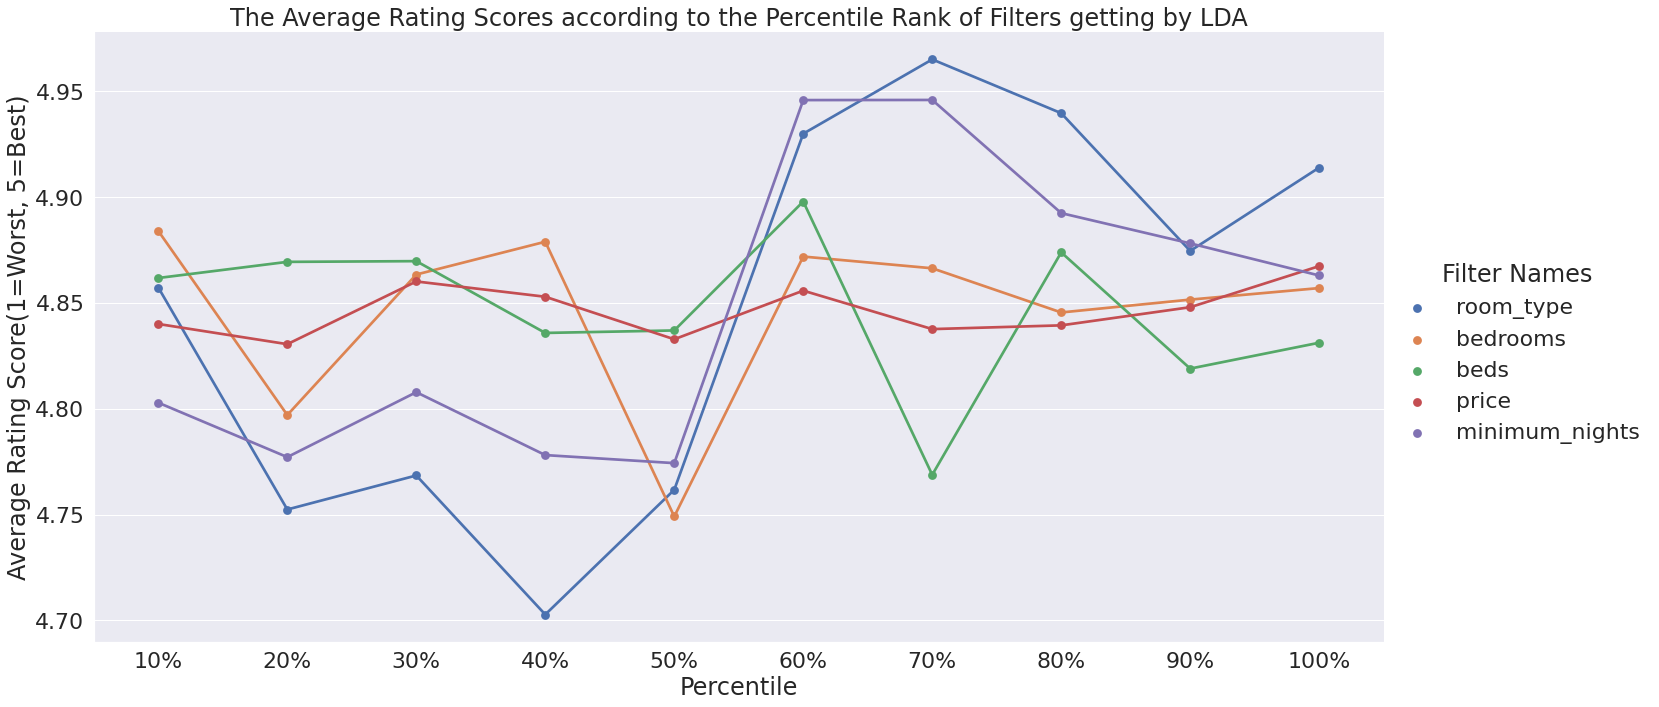

In [ ]:
import seaborn as sns
sns.set_theme(style="darkgrid")
sns.set(font_scale = 2)
plot_df = new_df.melt('Percentile', var_name='Filter Names',  value_name='Average Rating Score(1=Worst, 5=Best)')
sns.catplot(x="Percentile", y="Average Rating Score(1=Worst, 5=Best)", hue='Filter Names', data=plot_df, kind='point', height=10, aspect=20/10).set(title="The Average Rating Scores according to the Percentile Rank of Filters getting by LDA")